In [1]:
#!/usr/bin/env python
# coding: utf-8


import pandas
import numpy
import os
import matplotlib.pyplot as plot
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error


### Load Dataset

In [2]:
def load_csv(file_name):
    return pandas.read_csv(file_name)

In [3]:
file_name = 'data' + os.sep + 'WineQualityMix.csv'
data_frame = load_csv(file_name)
data_frame

,type,fixed acidity,volatile_acidity,citric_acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6
1,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
2,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
3,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12989,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
12990,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
12991,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
12992,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5


In [4]:
print(data_frame.info())
print('------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  12994 non-null  object 
 1   fixed acidity         12984 non-null  float64
 2   volatile_acidity      12986 non-null  float64
 3   citric_acid           12991 non-null  float64
 4   residual sugar        12992 non-null  float64
 5   chlorides             12992 non-null  float64
 6   free sulfur dioxide   12994 non-null  float64
 7   total sulfur dioxide  12994 non-null  float64
 8   density               12994 non-null  float64
 9   pH                    12985 non-null  float64
 10  sulphates             12990 non-null  float64
 11  alcohol               12994 non-null  float64
 12  quality               12994 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.3+ MB
None
------------------------------------


In [5]:
print(data_frame.describe())
print('------------------------------------')

       fixed acidity  volatile_acidity   citric_acid  residual sugar  \
count   12984.000000      12986.000000  12991.000000    12992.000000   
mean        7.215943          0.339678      0.318678        5.443781   
std         1.296542          0.164636      0.145286        4.757781   
min         3.800000          0.080000      0.000000        0.600000   
25%         6.400000          0.230000      0.250000        1.800000   
50%         7.000000          0.290000      0.310000        3.000000   
75%         7.700000          0.400000      0.390000        8.100000   
max        15.900000          1.580000      1.660000       65.800000   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  12992.000000         12994.000000          12994.000000  12994.000000   
mean       0.056038            30.525319            115.744574      0.994697   
std        0.035033            17.748717             56.519679      0.002999   
min        0.009000            

# correlation between every two features
### We have to find those features that are fully correlated to each other because relationship among them impacts the model accuracy.

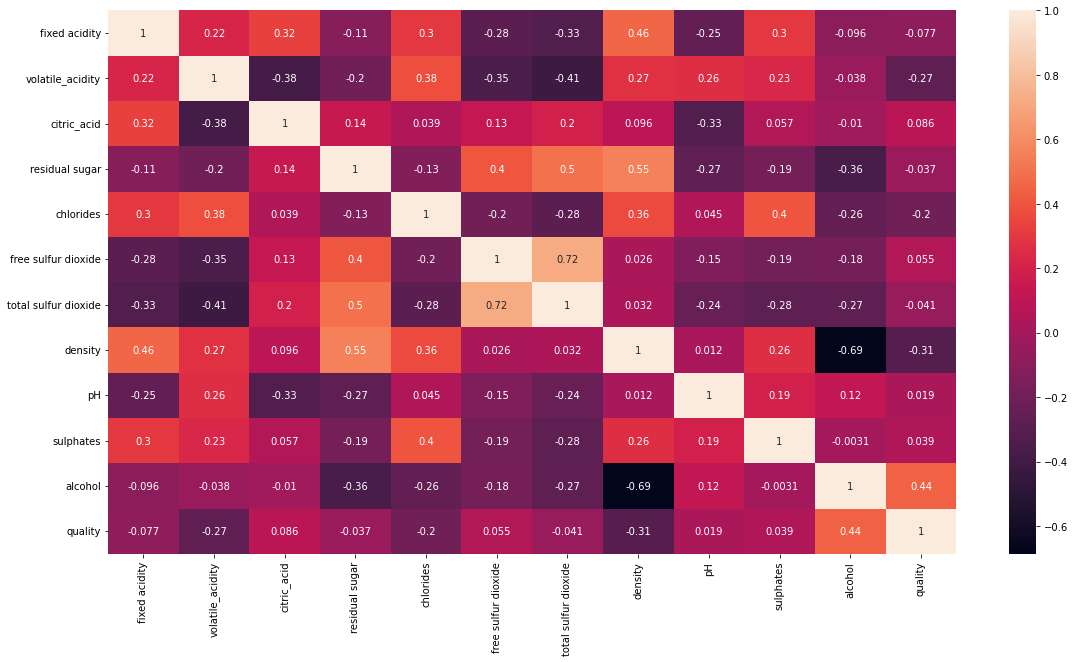

In [6]:
plot.figure(figsize=[19,10],facecolor='white')
seaborn.heatmap(data_frame.corr(),annot=True)
plot.show()

### Scanning for correlation between every two features

In [8]:
for a in range(len(data_frame.corr().columns)):
    for b in range(a):
        if abs(data_frame.corr().iloc[a,b]) >0.7:
            name = data_frame.corr().columns[a]
            print(name)

total sulfur dioxide


### Droping correlated features

In [9]:
data_frame = data_frame.drop(name,axis=1)
data_frame

,type,fixed acidity,volatile_acidity,citric_acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.0,0.21,0.38,0.8,0.020,22.0,0.98941,3.26,0.32,11.8,6
1,white,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7
2,white,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6
3,white,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5
4,white,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
12989,red,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
12990,red,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
12991,red,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
12992,red,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5


### Dropping unneccesery column

After researching for the features that affects the quality of wine, we removed the ones that did not affect

In [10]:
def drop_col(df, col):
    list_col = df.columns
    df.drop(col, axis  =1, inplace= True)

In [12]:
col = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','density','sulphates']
drop_col(data_frame, col)

In [13]:
data_frame

,type,volatile_acidity,citric_acid,pH,alcohol,quality
0,white,0.21,0.38,3.26,11.8,6
1,white,0.29,0.30,3.34,12.8,7
2,white,0.24,0.19,2.99,9.4,6
3,white,0.32,0.36,3.15,9.6,5
4,white,0.21,0.29,3.27,11.2,6
...,...,...,...,...,...,...
12989,red,0.70,0.00,3.51,9.4,5
12990,red,0.28,0.56,3.16,9.8,6
12991,red,0.76,0.04,3.26,9.8,5
12992,red,0.88,0.00,3.20,9.8,5


### Handling Duplicates

In [14]:
data_frame[data_frame.duplicated()]

,type,volatile_acidity,citric_acid,pH,alcohol,quality
16,white,0.235,0.27,3.07,9.400000,6
18,white,0.340,0.40,3.15,9.533333,6
42,white,0.230,0.39,2.90,9.000000,6
48,white,0.330,0.44,3.10,9.600000,5
49,white,0.360,0.35,3.05,11.100000,6
...,...,...,...,...,...,...
12989,red,0.700,0.00,3.51,9.400000,5
12990,red,0.280,0.56,3.16,9.800000,6
12991,red,0.760,0.04,3.26,9.800000,5
12992,red,0.880,0.00,3.20,9.800000,5


### Droping duplicates

In [15]:
data_frame = data_frame.drop_duplicates()

In [16]:
data_frame

,type,volatile_acidity,citric_acid,pH,alcohol,quality
0,white,0.210,0.38,3.26,11.8,6
1,white,0.290,0.30,3.34,12.8,7
2,white,0.240,0.19,2.99,9.4,6
3,white,0.320,0.36,3.15,9.6,5
4,white,0.210,0.29,3.27,11.2,6
...,...,...,...,...,...,...
11393,red,0.880,0.00,3.20,9.8,5
11405,red,NaN,0.33,3.27,12.8,6
11462,red,0.705,0.10,NaN,10.2,5
11463,red,0.440,0.09,NaN,11.3,6


# Handle null values

In [17]:
data_frame.isnull().sum()

type                0
volatile_acidity    8
citric_acid         3
pH                  9
alcohol             0
quality             0
dtype: int64

### Filling null values with the fillna() function.

In [18]:
# using 'numeric_only=True' we handle only numerical variables value and ignore strings

data_frame.update(data_frame.fillna(data_frame.mean(numeric_only=True)))
data_frame

C:\Users\natim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


,type,volatile_acidity,citric_acid,pH,alcohol,quality
0,white,0.21000,0.38000,3.260000,11.8,6
1,white,0.29000,0.30000,3.340000,12.8,7
2,white,0.24000,0.19000,2.990000,9.4,6
3,white,0.32000,0.36000,3.150000,9.6,5
4,white,0.21000,0.29000,3.270000,11.2,6
...,...,...,...,...,...,...
11393,red,0.88000,0.00000,3.200000,9.8,5
11405,red,0.34424,0.33000,3.270000,12.8,6
11462,red,0.70500,0.10000,3.224379,10.2,5
11463,red,0.44000,0.09000,3.224379,11.3,6


In [19]:
data_frame.isnull().sum()

type                0
volatile_acidity    0
citric_acid         0
pH                  0
alcohol             0
quality             0
dtype: int64

# Visualization

### Histogram 

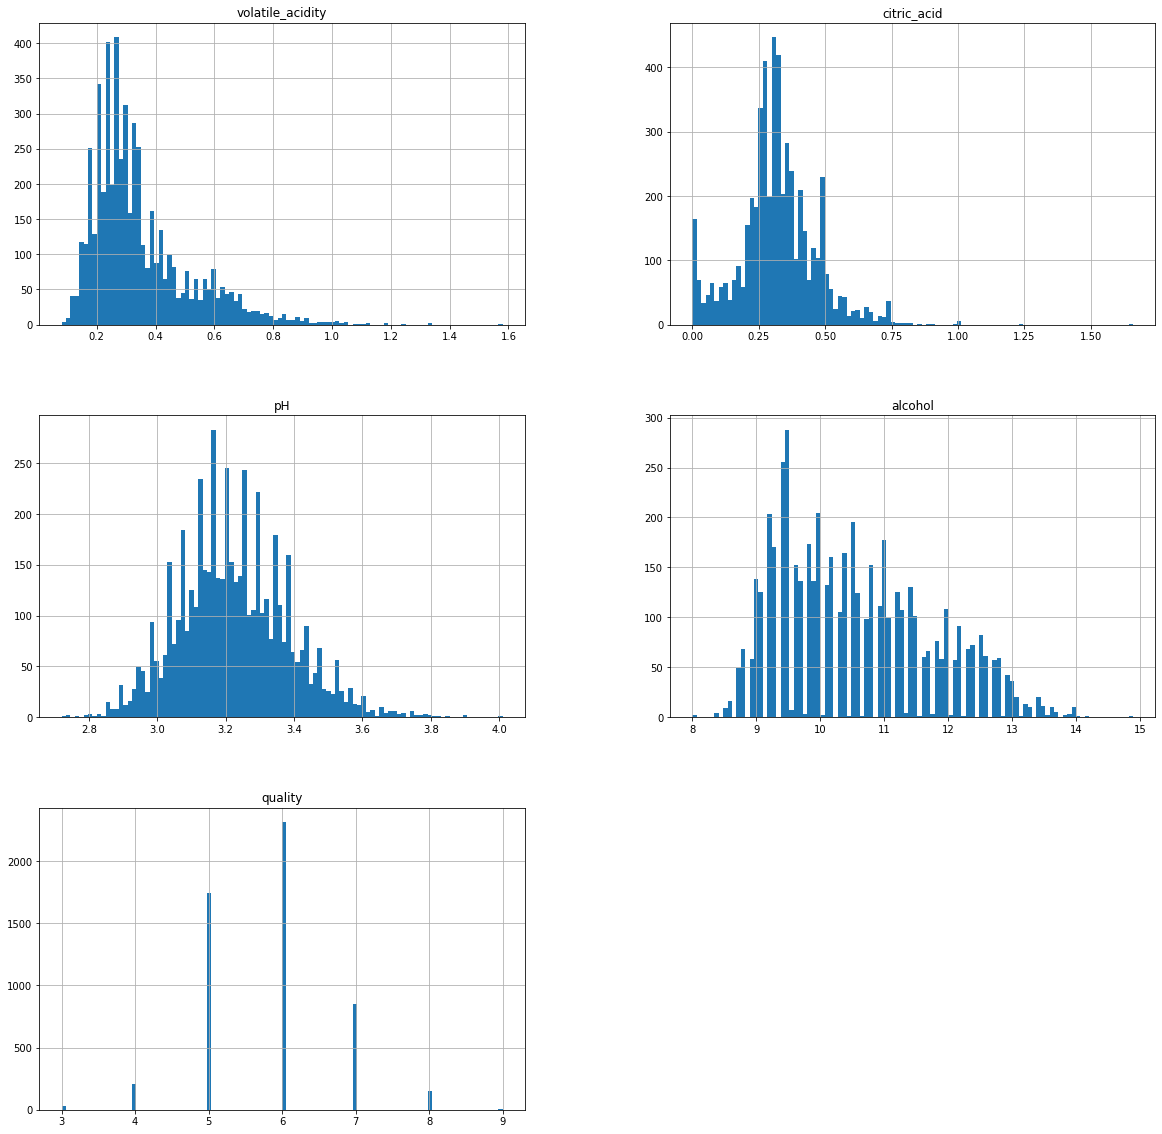

In [20]:
data_frame.hist(bins=100,figsize=(20,20))
plot.show()

### Box Plotting to detect outliers.

C:\Users\natim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\natim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\natim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: Futu

<AxesSubplot:title={'center':'alcohol'}, xlabel='alcohol'>

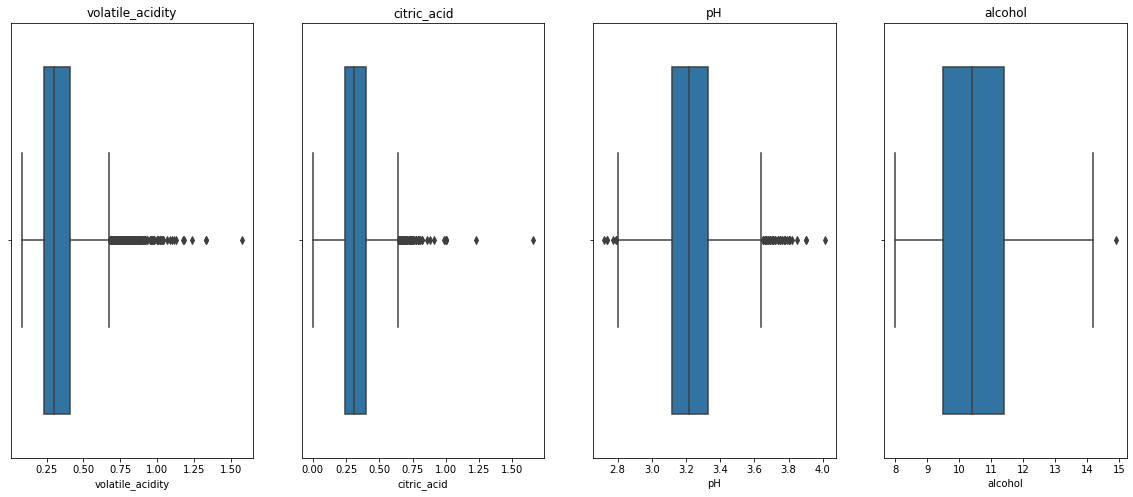

In [21]:
fig, (ax1,ax2,ax3,ax4) = plot.subplots(1,4, figsize=(20,8))

ax1.set_title('volatile_acidity')
seaborn.boxplot(data_frame['volatile_acidity'], ax=ax1)

ax2.set_title('citric_acid')
seaborn.boxplot(data_frame['citric_acid'], ax=ax2)

ax3.set_title('pH')
seaborn.boxplot(data_frame['pH'], ax=ax3)

ax4.set_title('alcohol')
seaborn.boxplot(data_frame['alcohol'], ax=ax4)

### calculating z_score to detect outliers edges

In [22]:
z_score = (data_frame["volatile_acidity"] - data_frame["volatile_acidity"].mean()) / data_frame["volatile_acidity"].std()

outliers = abs(z_score) > 3
vol_acd_min = min(data_frame.volatile_acidity[outliers])

print(sum(outliers))
print(vol_acd_min)

76
0.85


In [23]:
z_score = (data_frame["citric_acid"] - data_frame["citric_acid"].mean()) / data_frame["citric_acid"].std()

outliers = abs(z_score) > 3
cit_acd_min = min(data_frame.citric_acid[outliers])

print(sum(outliers))
print(cit_acd_min)

26
0.76


In [24]:
z_score = (data_frame["pH"] - data_frame["pH"].mean()) / data_frame["pH"].std()

pH_max = max(data_frame.pH[outliers])
pH_min = min(data_frame.pH[outliers])

print(sum(outliers))
print(pH_max)
print(pH_min)

26
3.39
2.74


In [25]:
z_score = (data_frame["alcohol"] - data_frame["alcohol"].mean()) / data_frame["alcohol"].std()

outliers = abs(z_score) > 3
alc_min = min(data_frame.alcohol[outliers])

print(sum(outliers))
print(alc_min)

2
14.2


### Adressing ouliers:

In [26]:
data_frame.volatile_acidity[data_frame.volatile_acidity > vol_acd_min] = numpy.nan
data_frame.fillna(numpy.mean(data_frame['volatile_acidity']), inplace= True)



data_frame.citric_acid[data_frame.citric_acid > cit_acd_min] = numpy.nan
data_frame.fillna(numpy.mean(data_frame['citric_acid']), inplace= True)



data_frame.pH[data_frame.pH > pH_max] = numpy.nan
data_frame.fillna(numpy.mean(data_frame['pH']), inplace= True)

data_frame.pH[data_frame.pH < pH_min] = numpy.nan
data_frame.fillna(numpy.mean(data_frame['pH']), inplace= True)



data_frame.alcohol[data_frame.alcohol > alc_min] = numpy.nan
data_frame.fillna(numpy.mean(data_frame['alcohol']), inplace= True)

C:\Users\natim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\natim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\natim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37

### Box plotting again to see if outliers dropped.

C:\Users\natim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\natim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\natim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: Futu

<AxesSubplot:title={'center':'alcohol'}, xlabel='alcohol'>

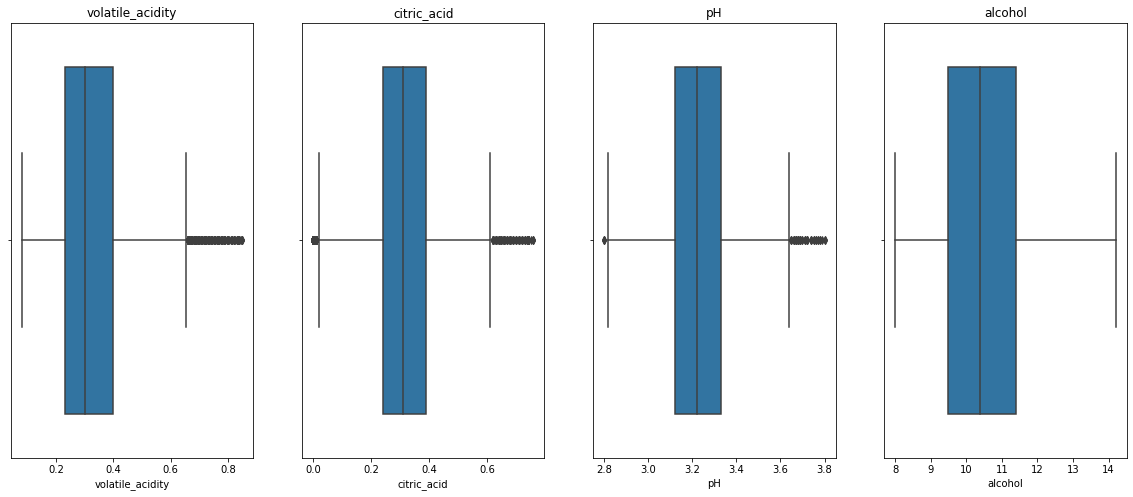

In [27]:
fig, (ax1,ax2,ax3,ax4) = plot.subplots(1,4, figsize=(20,8))

ax1.set_title('volatile_acidity')
seaborn.boxplot(data_frame['volatile_acidity'], ax=ax1)

ax2.set_title('citric_acid')
seaborn.boxplot(data_frame['citric_acid'], ax=ax2)

ax3.set_title('pH')
seaborn.boxplot(data_frame['pH'], ax=ax3)

ax4.set_title('alcohol')
seaborn.boxplot(data_frame['alcohol'], ax=ax4)

# EDA - Exploring & Data Analysis


### Questions we would like to answer:

1. Is there a difference between red wine and white wine regarding wine quality?
2. What is the effect of the various acidity parameters on wine quality?
3. Dose alcohol level impacts on wine quality?
4. What is the effect of the pH index on wine quality?

### Q1. Is there a difference between red wine and white wine regarding wine quality?

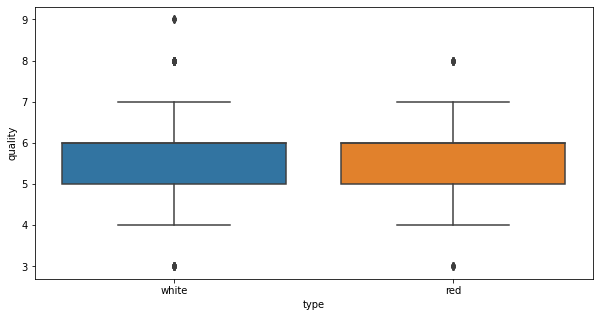

In [28]:
# boxplot to show majority of of quality score for both red and white wine

plot.figure(figsize=(10,5))
seaborn.boxplot(x='type', y='quality', data=data_frame)

plot.show()

### A1. There is no significant difference between red and white wine regarding quality, and thus "type" will not become one of selected features

In [29]:


# Get dummies is used for handling categorical columns, 
# in our dataset ‘Type’ column feature contains two types 'Red' and 'White',
# where Red consider as 0 and white considers as 1

data_frame = pandas.get_dummies(data_frame,drop_first=True)

# display new dataframe
data_frame

,volatile_acidity,citric_acid,pH,alcohol,quality,type_white
0,0.210000,0.38000,3.260000,11.8,6,1
1,0.290000,0.30000,3.340000,12.8,7,1
2,0.240000,0.19000,2.990000,9.4,6,1
3,0.320000,0.36000,3.150000,9.6,5,1
4,0.210000,0.29000,3.270000,11.2,6,1
...,...,...,...,...,...,...
11393,0.335406,0.00000,3.200000,9.8,5,0
11405,0.344240,0.33000,3.270000,12.8,6,0
11462,0.705000,0.10000,3.224379,10.2,5,0
11463,0.440000,0.09000,3.224379,11.3,6,0


# Normalization
(for scaling and visualize graphs)

In [42]:
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(data_frame)
# transformation of training data
data_frame_new_scaled = norm_fit.transform(data_frame)
# display values
print(data_frame_new_scaled)

[[0.16883117 0.5        0.46       0.61290323 0.5        1.        ]
 [0.27272727 0.39473684 0.54       0.77419355 0.66666667 1.        ]
 [0.20779221 0.25       0.19       0.22580645 0.5        1.        ]
 ...
 [0.81168831 0.13157895 0.42437866 0.35483871 0.33333333 0.        ]
 [0.46753247 0.11842105 0.42437866 0.53225806 0.5        0.        ]
 [0.5974026  0.41926278 0.59       0.5483871  0.5        0.        ]]


In [43]:
data_frame_new = pandas.DataFrame(data_frame_new_scaled,columns = ['volatile_acidity','citric_acid','pH','alcohol','quality','type_white'])

In [44]:
data_frame_new

,volatile_acidity,citric_acid,pH,alcohol,quality,type_white
0,0.168831,0.500000,0.460000,0.612903,0.500000,1.0
1,0.272727,0.394737,0.540000,0.774194,0.666667,1.0
2,0.207792,0.250000,0.190000,0.225806,0.500000,1.0
3,0.311688,0.473684,0.350000,0.258065,0.333333,1.0
4,0.168831,0.381579,0.470000,0.516129,0.500000,1.0
...,...,...,...,...,...,...
5291,0.331696,0.000000,0.400000,0.290323,0.333333,0.0
5292,0.343169,0.434211,0.470000,0.774194,0.500000,0.0
5293,0.811688,0.131579,0.424379,0.354839,0.333333,0.0
5294,0.467532,0.118421,0.424379,0.532258,0.500000,0.0


### Q2. What is the effect of the various acidity parameters on wine quality?

<AxesSubplot:xlabel='quality'>

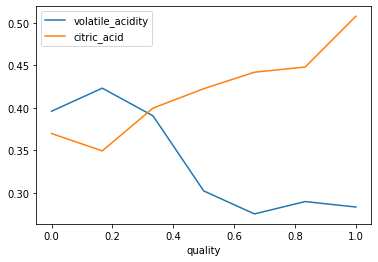

In [45]:
# plot to show difference between various acidity


df_plot = data_frame_new.groupby(['quality']).mean()[['volatile_acidity','citric_acid']]
df_plot.plot()

### A2. A small amount of volatile acid and a high amount of citric acid are required in order for the quality of the wine to improve

### Q3. Does alcohol level impacts on wine quality?

<AxesSubplot:xlabel='quality'>

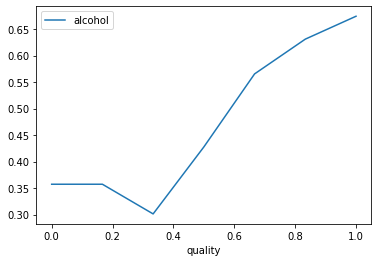

In [46]:
# plot to show alcohol levels


df_plot = data_frame_new.groupby(['quality']).mean()[['alcohol']]
df_plot.plot()

### A3. We can see that when alcohol levels increases, the wine quality increases as well.

### Q4. What is the effect of the pH index on wine quality?

<AxesSubplot:xlabel='quality'>

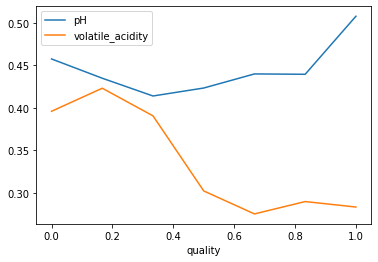

In [47]:
# plot to show pH and volatile acidity relationship


df_plot = data_frame_new.groupby(['quality']).mean()[['pH','volatile_acidity']]
df_plot.plot()

### A4. The rising pH index can be seen to indicate a decrease in volatile acidity which raises the quality of the wine

## In order to decide whether the wine is in good quality or not, we will classify to decide

In [59]:
data_frame_new['best quality'] = [1 if quality >=7 else 0 for quality in data_frame.quality]
data_frame_new

,volatile_acidity,citric_acid,pH,alcohol,quality,type_white,best quality
0,0.168831,0.500000,0.460000,0.612903,0.500000,1.0,0
1,0.272727,0.394737,0.540000,0.774194,0.666667,1.0,1
2,0.207792,0.250000,0.190000,0.225806,0.500000,1.0,0
3,0.311688,0.473684,0.350000,0.258065,0.333333,1.0,0
4,0.168831,0.381579,0.470000,0.516129,0.500000,1.0,0
...,...,...,...,...,...,...,...
5291,0.331696,0.000000,0.400000,0.290323,0.333333,0.0,0
5292,0.343169,0.434211,0.470000,0.774194,0.500000,0.0,0
5293,0.811688,0.131579,0.424379,0.354839,0.333333,0.0,0
5294,0.467532,0.118421,0.424379,0.532258,0.500000,0.0,0


# Splitting dataset

In [130]:
# independent variables
X = data_frame_new.drop(['quality','best quality'], axis=1)
# dependent variable
y = data_frame_new['best quality']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Model Building

In [160]:
def ML(model):
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test)*100
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    print(f'Accuracy Test Score: %.3f Precent' %score)
    return score

In [161]:
score_list = []

### Logistic Regression Model

In [163]:
lg_reg= LogisticRegression()
lg_score = ML(lg_reg)
score_list.append(lg_score)

Accuracy Test Score: 81.949 Precent


### Decision Tree Classifier Model

In [165]:
from sklearn.tree import DecisionTreeClassifier

desc_tree= DecisionTreeClassifier()
desc_score = ML(desc_tree)
score_list.append(desc_score)

Accuracy Test Score: 76.586 Precent


### K-Neighbors Classifier Model

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score


# Testing best k value for KNN

clf = KNeighborsClassifier()
scores = cross_val_score(clf, X, y, cv=10)
scores_list=[cross_val_score(clf, X, y, cv=flds).mean() for flds in range(3,31)]
print("highest result with K-fold, k=",numpy.argmax(scores_list)+3)

highest result with K-fold, k= 30


In [168]:
KNN= KNeighborsClassifier(n_neighbors=5)
KNN_score = ML(KNN)
score_list.append(KNN_score)

Accuracy Test Score: 80.438 Precent


### Support vector machine ( Support Vector Calssifier) Model

In [170]:
from sklearn.svm import SVC


SVM = SVC()
svm_score = ML(SVM)
score_list.append(svm_score)

Accuracy Test Score: 82.326 Precent


In [171]:
models = ['Logistics Regression', 'Decision Tree Classifier', 'KNN', 'SVM']
score_df = pandas.DataFrame({"Model": models, "score": score_list})
score_df

,Model,score
0,Logistics Regression,81.948640
1,Decision Tree Classifier,76.586103
2,KNN,80.438066
3,SVM,82.326284


### We can see that "Decision Tree classifier" is only 76.5% accurate.
### "Logistic Regression" and "SVM" accuracy of 82%!